In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
sns.set()

In [2]:
df = pd.read_csv("advertising.csv", delimiter=',')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.max()

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

In [6]:
df.min()

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

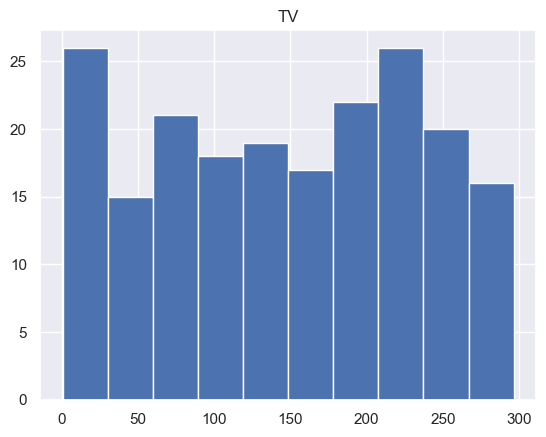

In [33]:
plt.hist(df["TV"])
plt.title("TV")
plt.show()

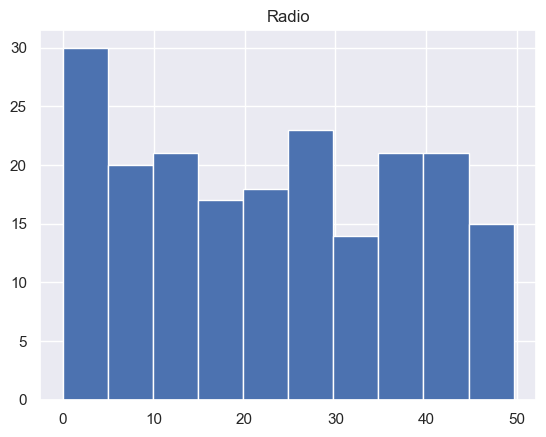

In [31]:
plt.hist(df["Radio"])
plt.title("Radio")
plt.show()

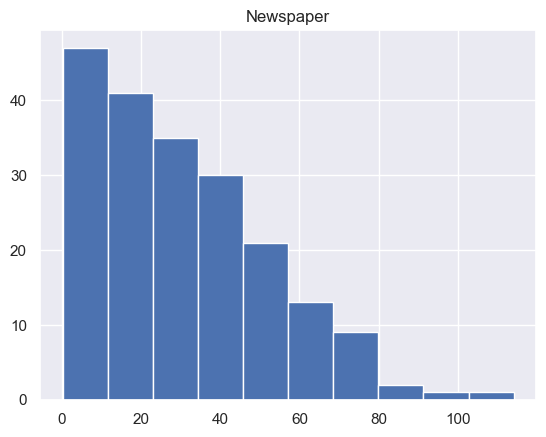

In [34]:
plt.hist(df["Newspaper"])
plt.title("Newspaper")
plt.show()

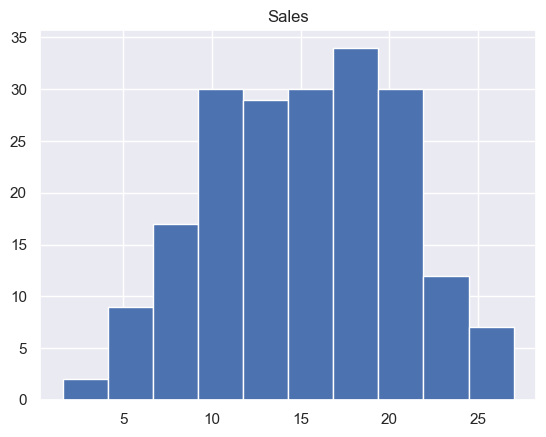

In [35]:
plt.hist(df["Sales"])
plt.title("Sales")
plt.show()

In [11]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)


In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 2.9077569102710923
R-squared: 0.9059011844150826


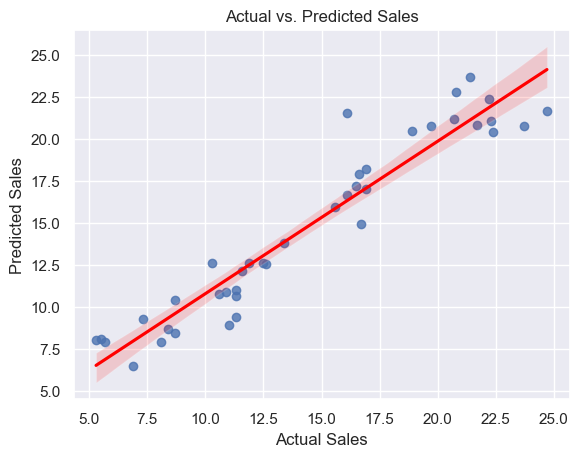

In [28]:
sns.regplot(x= y_test, y= y_pred, line_kws={"color":"red"})
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

### OBSERVATION_1

In [36]:
new_data = pd.DataFrame({
    'TV': [100],
    'Radio': [20],
    'Newspaper': [10]
})

predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 12.227327202015566


In [17]:
coefficients = model.coef_
intercept = model.intercept_

In [18]:
def sales_prediction(advertising):
    return intercept + np.dot(coefficients, advertising)

In [19]:
def cost_function(advertising):
    return np.sum(advertising)

In [20]:
def constraint_function(advertising):

    target_sales = df['Sales'].max()
    return sales_prediction(advertising) - target_sales

### OBSERVATION_2

In [38]:
initial_input = [10,100,100]
bounds = [(df['TV'].min(), None), ((df['Radio'].min()), None), ((df['Newspaper'].min(), None))]
constraints = [{'type': 'ineq', 'fun': constraint_function}]
result = minimize(cost_function, initial_input, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_advertising = result.x
print(f"Optimized Advertising Costs: TV: {optimized_advertising[0]:.2f}, Radio: {optimized_advertising[1]:.2f}, Newspaper: {optimized_advertising[2]:.2f}")
print(f"Predicted Sales with Optimized Advertising: {sales_prediction(optimized_advertising):.2f}")

Optimized Advertising Costs: TV: 0.70, Radio: 220.38, Newspaper: 0.30
Predicted Sales with Optimized Advertising: 27.00


## OBSERVATIONS:

As per the given dataset and observations based on the liner regression model we can check the sales output and initial advertisement costing as shown in observation_1.
According to the dataset provided initially when we were investing 296.4 on TV, 49.6 on Radio and 114 on Newspaper then we were able to generate a sales output of 27.0, but as per the observation_2, if we only invest 0.70 on TV, 220.38 on Radio and 0.30 on Newspaper still we would be able to generate a sales of 27.0, which states that with lesser advertisement cost and focusing in right advertising platform selection we can generate the same sales output.